In [1]:
#!/usr/bin/env python
# coding: utf-8

%load_ext autoreload
%autoreload 2

import os, datetime
import torch, pyro, numpy as np
# torch.set_default_tensor_type(torch.cuda.FloatTensor)

import swyft
import click


DEVICE = 'cuda'

from utils import *
# from network import CustomTail, CustomHead

from swyft.utils import tensor_to_array, array_to_tensor
from toolz import compose
from pyrofit.lensing.distributions import get_default_shmf

import torch, numpy as np
# torch.set_default_tensor_type(torch.cuda.FloatTensor)
from torch import tensor
import torch.nn as nn
import torchvision.transforms.functional as TF


# @click.command()
# @click.option("--m",    type=int, default = 12,  help="Exponent of subhalo mass.")
# @click.option("--nsub", type=int, default = 1,   help="Number of subhaloes.")
# @click.option("--nsim", type=int, default = 100, help="Number of simulations to run.")

# @click.option("--nmbins",  type=int, default = 2,   help="Number of mass bins.")

# @click.option("--lr",         type=float, default = 1e-3, help="Learning rate.")
# @click.option("--factor",     type=float, default = 1e-1, help = "Factor of Scheduler")
# @click.option("--patience",   type=int,   default = 5,    help = "Patience of Scheduler")
# @click.option("--max_epochs", type=int,   default = 30,   help = "Max number of epochs.")



m = 0
nsub = 3
nsim = 200

nmbins = 2

lr = 1e-3
factor = 1e-1
patience = 5
max_epochs = 1

In [2]:
time_start = datetime.datetime.now()

# Set definitions (should go to click)
system_name = "ngc4414"

# Set utilities
sim_name, sim_path = get_sim_path(m, nsub, nsim, system_name)
store = swyft.Store.load(path=sim_path)
print(f'Store has {len(store)} simulations.')

# torch.set_default_tensor_type(torch.cuda.FloatTensor)  # HACK
CONFIG = get_config(system_name, str(nsub), str(m))
# torch.set_default_tensor_type(torch.FloatTensor)

prior, n_pars, lows, highs = get_prior(CONFIG)
L = CONFIG.kwargs["defs"]["nx"]
print(f'Image has L = {L}.')

# Set up posterior
# torch.set_default_tensor_type(torch.FloatTensor)
dataset = swyft.Dataset(nsim, prior, store)#, simhook = noise)
# marginals = [i for i in range(L**2)]
# post = swyft.Posteriors(dataset)

Store _M_m0_nsub3_nsim200 exists!
Loading existing store.
Store has 208 simulations.
Image has L = 40.


In [3]:
# Train
mre_name, mre_path = get_mre_path(sim_name, nmbins, lr, factor, patience)

# post_name, post_path = get_post_path(sim_name, nmbins, lr, factor, patience)
print(f'Training {mre_name}!')

Training UNet_M_m0_nsub3_nsim200_nmbins2_lr-3.0_fac-1.0_pat5.pt!


In [4]:
x_sub = tensor([0.2115, 0.3560, 0.2756, 0.6081, 0.9811, 0.2598, 0.2115, 0.3560, 0.2756,
        0.6081, 0.9811, 0.2598, 0.3144, 0.6416, 0.9573, 0.9276, 0.2636, 0.3063,
        0.3144, 0.6416, 0.9573, 0.9276, 0.2636, 0.3063, 0.0806, 0.7104, 0.8063,
        0.3028, 0.1110, 0.3599, 0.0806, 0.7104, 0.8063, 0.3028, 0.1110, 0.3599,
        0.4031, 0.0011, 0.4391, 0.2452, 0.7089, 0.2840, 0.4031, 0.0011, 0.4391,
        0.2452, 0.7089, 0.2840, 0.5606, 0.0076, 0.3274, 0.2611, 0.5907, 0.1507,
        0.5606, 0.0076, 0.3274, 0.2611, 0.5907, 0.1507, 0.4513, 0.9853, 0.3862,
        0.6888, 0.0784, 0.5995, 0.4513, 0.9853, 0.3862, 0.6888, 0.0784, 0.5995,
        0.0761, 0.2028, 0.0544, 0.8060, 0.4872, 0.7683, 0.0761, 0.2028, 0.0544,
        0.8060, 0.4872, 0.7683, 0.3211, 0.4404, 0.9005, 0.4054, 0.8353, 0.8764,
        0.3211, 0.4404, 0.9005, 0.4054, 0.8353, 0.8764, 0.3151, 0.5199, 0.4070,
        0.8590, 0.0778, 0.1821, 0.3151, 0.5199, 0.4070, 0.8590, 0.0778, 0.1821,
        0.8068, 0.9197, 0.5910, 0.4910, 0.8023, 0.5562, 0.8068, 0.9197, 0.5910,
        0.4910, 0.8023, 0.5562, 0.7239, 0.3277, 0.5085, 0.1846, 0.3840, 0.0365,
        0.7239, 0.3277, 0.5085, 0.1846, 0.3840, 0.0365, 0.3012, 0.9667, 0.7657,
        0.8044, 0.3379, 0.2162, 0.3012, 0.9667, 0.7657, 0.8044, 0.3379, 0.2162,
        0.5010, 0.7909, 0.7357, 0.5903, 0.4078, 0.3215, 0.5010, 0.7909, 0.7357,
        0.5903, 0.4078, 0.3215, 0.2226, 0.4193, 0.9170, 0.9889, 0.3001, 0.2749,
        0.2226, 0.4193, 0.9170, 0.9889, 0.3001, 0.2749, 0.7480, 0.6731, 0.7404,
        0.1894, 0.9677, 0.1472, 0.7480, 0.6731, 0.7404, 0.1894, 0.9677, 0.1472,
        0.7026, 0.1189, 0.9637, 0.3236, 0.6671, 0.8069, 0.7026, 0.1189, 0.9637,
        0.3236, 0.6671, 0.8069, 0.8615, 0.4561, 0.2126, 0.2337, 0.8004, 0.8861,
        0.8615, 0.4561, 0.2126, 0.2337, 0.8004, 0.8861, 0.0899, 0.2460, 0.7161,
        0.4919, 0.0202, 0.6574, 0.0899, 0.2460, 0.7161, 0.4919, 0.0202, 0.6574,
        0.7261, 0.1654, 0.5283, 0.3482, 0.2720, 0.3377, 0.7261, 0.1654, 0.5283,
        0.3482, 0.2720, 0.3377, 0.2727, 0.1196, 0.6284, 0.8131, 0.4599, 0.0058,
        0.2727, 0.1196, 0.6284, 0.8131, 0.4599, 0.0058, 0.3205, 0.3360, 0.9017,
        0.4791, 0.0684, 0.9473, 0.3205, 0.3360, 0.9017, 0.4791, 0.0684, 0.9473,
        0.1627, 0.7153, 0.2867, 0.0994, 0.0360, 0.0230, 0.1627, 0.7153, 0.2867,
        0.0994, 0.0360, 0.0230, 0.2699, 0.4420, 0.8842, 0.2158, 0.4640, 0.0654,
        0.2699, 0.4420, 0.8842, 0.2158, 0.4640, 0.0654, 0.9138, 0.5191, 0.4969,
        0.7719, 0.1218, 0.3584, 0.9138, 0.5191, 0.4969, 0.7719, 0.1218, 0.3584,
        0.3375, 0.6258, 0.3890, 0.4271, 0.1700, 0.5824, 0.3375, 0.6258, 0.3890,
        0.4271, 0.1700, 0.5824], device='cuda:0', dtype=torch.float64)

In [5]:
np.histogram(x_sub, )

(array([32, 24, 38, 46, 34, 24, 18, 28, 28, 28]),
 array([0.0011 , 0.09988, 0.19866, 0.29744, 0.39622, 0.495  , 0.59378,
        0.69256, 0.79134, 0.89012, 0.9889 ]))

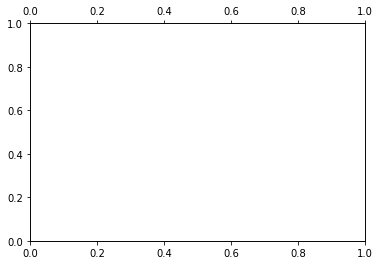

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

In [7]:
pow(10,8.5) / 10**8.5

1.0

In [8]:
x1 = tensor([2.1340e+09, 3.9609e+08, 2.1340e+09, 3.9609e+08, 3.2782e+08, 8.2909e+08,
        3.2782e+08, 8.2909e+08, 8.6815e+08, 9.7979e+08], device='cuda:0')
x2 = tensor([0.0581, 0.0026, 0.0581, 0.0026, 0.0004, 0.0164, 0.0004, 0.0164, 0.0176,
        0.0212], dtype=torch.float64)

[9 1]


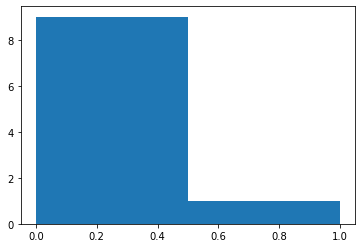

In [9]:
y = tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], device='cuda:0')
h, b = np.histogram(y, bins = [0, 0.5, 1])
plt.hist(y.numpy(), bins =  [0, 0.5, 1]);
print(h)

In [10]:
# # x1 = tensor([3.5582e+08, 6.4525e+09, 3.5582e+08, 6.4525e+09], device='cuda:0')
# # x2 = tensor([0.0013, 0.1960, 0.0013, 0.1960], dtype=torch.float64)

# y = tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], device='cuda:0')
# h, b = np.histogram(y, bins = 2)
# print(h)

# if h[1] > 0:

#     fig, (ax1, ax2) = plt.subplots(2, 1)



#     ax1.vlines(x, 0, 1)
#     ax1.vlines(10**9.5, 0, 1, colors = 'r')
#     ax1.set_xscale('log')
#     ax1.set_xlim(10**8.5, 10**10.5)

#     ax2.vlines(x2, 0, 1)
#     ax2.set_xlim(0, 1)
#     plt.show()

In [11]:
# [10**8.5, 10**9.5, 10**10.5]

In [12]:
# pow(10*&, ([8.5, 9.5, 10.5]))

In [13]:
# a, _, _ = plt.hist(x1.numpy(), bins = [10**8.5, 10**9.5, 10**10.5])

In [14]:
x = np.array([np.arange(0, 9)]*4)
print(x)
x[:,2::3]

[[0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]]


array([[2, 5, 8],
       [2, 5, 8],
       [2, 5, 8],
       [2, 5, 8]])

In [15]:
np.repeat([np.arange(0, 9)], 4, axis = 1)

array([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
        5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8]])

In [16]:


class Mapping:
    def __init__(self, nmbins, L, lows, highs):
        self.nmbins = nmbins
        self.L   = L
        self.lows = lows
        self.highs = highs
        
    def v_to_grid(self, coord_v):
        
        coord_v = coord_v.squeeze(2)
        
        coord_v10 = torch.clone(coord_v)
        # Transform all masses from e.g. 10^8.5 to 8.5 so they are aligned with the highs and lows
        coord_v10[:,2::3] = torch.log10(coord_v10[:,2::3])
        
        n = len(coord_v[0])/3
        assert n.is_integer()
        n = int(n)
          
        lows = np.full(coord_v.shape, np.tile(self.lows, n))
        highs = np.full(coord_v.shape, np.tile(self.highs, n))   
        
        grid = lambda v: (v - lows) / (highs - lows)
        coord_grid = grid(coord_v10)
        
        
        return coord_grid

    def coord_to_map(self, coord_v):        
         
        coord_grid = self.v_to_grid(coord_v)
        
        n_batch =  coord_grid.shape[0]
        n_coords = coord_grid.shape[1]*2/3
        assert n_coords.is_integer()

#         z0 = torch.ones((n_batch, self.nmbins, self.L, self.L), device = DEVICE)
#         z1 = torch.zeros((n_batch, self.nmbins, self.L, self.L), device = DEVICE)
        z = torch.zeros((n_batch, self.nmbins, self.L, self.L), device = DEVICE)

                
        if not (n_batch == 0 or n_coords == 0):
            
            x_grid, y_grid, m_grid = coord_grid.view(-1,3).T.to(DEVICE)            

            x_i = torch.floor((x_grid * self.L).flatten()).type(torch.long) 
            y_i = torch.floor((y_grid * self.L).flatten()).type(torch.long) 
            m_i = torch.floor( m_grid * self.nmbins).type(torch.long) 
            b_i   = torch.floor(torch.arange(0, n_batch, 1/n_coords*2).to(DEVICE)).type(torch.long)
            
            
            l = 50
            
        
#             x1 = coord_v[:l,2]
#             x2 = m_sub.view(-1, 3)[:l,0]
#             y = m_i.view(-1, 3)[:l,0]
            
            
#             h, b = np.histogram(y, bins = [0, 0.5, 1])
#             print(h)

#             if h[1] > 0:

#                 fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20, 5))


#                 ax1.vlines(x1, 0, 1)
#                 ax1.vlines(9.5, 0, 1, colors = 'r')
# #                 ax1.set_xscale('log')
#                 ax1.set_xlim(8.5, 10.5)

#                 ax2.vlines(x2, 0, 1)
#                 ax2.vlines(0.5, 0, 1, color = 'r')
# #                 ax2.set_xscale('log')
#                 ax2.set_xlim(0, 1)
                
#                 t1, _, _ = ax3.hist(x1.numpy(), bins = [8.5, 9.5, 10.5])
# #                 ax3.set_xscale('log')
#                 ax3.set_title(t1)
                
#                 t2, _, _ = ax4.hist(x2.numpy(), bins = [0, 0.5, 1.])
#                 ax4.set_title(t2)
                
                
#                 plt.show()

            indices = tuple(torch.stack((b_i, m_i, y_i, x_i)))
    #             z0[indices], z1[indices] = 0, 1
            z[indices] = 1
    
        return z
#         return torch.cat((z0, z1), dim = 1)



class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False), # bias = False becaise BatchNorm2d is set
            nn.BatchNorm2d(out_channels), # BatchNorm2d were not known when paper came out
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)

class UNET(nn.Module):
    def __init__(self, in_channels, out_channels, features = [64, 128, 256, 512]):
        super(UNET, self).__init__()
                
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # keep size the same
        

        # Down part of UNET
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature

        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(
                    feature*2, feature, kernel_size=2, stride=2,
                )
            )
            self.ups.append(DoubleConv(feature*2, feature))

        self.bottleneck = DoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)
        

    def forward(self, x):
                
        x = x.unsqueeze(1)
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1] # reverse list

        # the upsampling
        for idx in range(0, len(self.ups), 2): # step of 2 because we want up - double column - up - double column
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2] # //2 because we want still steps of one

            # if statement because we can put in shapes that are not divisble by two around 19:00 of video
            if x.shape != skip_connection.shape: 
                x = TF.resize(x, size=skip_connection.shape[2:]) # hopefully does not impact accuracy too much

            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip)

        x = self.final_conv(x)
        return x

class CustomObservationTransform(torch.nn.Module):
    def __init__(self, observation_key: str, observation_shapes: dict):
        super().__init__()
        self.observation_key = observation_key
        self.n_features = torch.prod(tensor(observation_shapes[observation_key]))

    def forward(self, obs: dict) -> torch.Tensor:      
        x = obs
        x = x[self.observation_key]
        x = x.view(len(x), self.n_features)
        return x

class CustomMarginalClassifier(torch.nn.Module):
    def __init__(self, n_marginals: int, n_combined_features: int):
        super().__init__()
                
        self.n_marginals = n_marginals
        self.n_combined_features = n_combined_features
        
        self.n_features = 1600 #n_features
        self.L = int(np.sqrt(self.n_features).item())
        self.nmbins = 2 #tail_args['nmbins']
        self.lows   = lows #tail_args['lows']
        self.highs  = highs #tail_args['highs']
        self.out_channels = self.nmbins
        
        
        
        self.Map  = Mapping(self.nmbins, self.L, self.lows, self.highs)
        self.UNet = UNET(in_channels = 1, out_channels = self.out_channels)
                
    def forward(
        self, features: torch.Tensor, marginal_block: torch.Tensor
    ) -> torch.Tensor:
        sims = features
        target = marginal_block
            
    
        sims = sims.view(-1, self.L, self.L)
        x = self.UNet(sims)
        z = self.Map.coord_to_map(target)
        
        x = x * z
        x = x.view(-1, self.n_features * self.out_channels)
        
        return x

    
def get_custom_marginal_classifier(
    observation_transform,
    marginal_indices: tuple,
    n_parameters: int,
    marginal_classifier,
    parameter_online_z_score: bool = False
) -> torch.nn.Module:
    n_observation_features = observation_transform.n_features
    
    parameter_transform = swyft.networks.ParameterTransform(
        n_parameters, marginal_indices, online_z_score=parameter_online_z_score
    )
    
    n_marginals, n_block_parameters = parameter_transform.marginal_block_shape

    marginal_classifier = marginal_classifier(
        n_marginals,
        n_observation_features + n_block_parameters,
    )

    return swyft.networks.Network(
        observation_transform,
        parameter_transform,
        marginal_classifier,
    )
    

# observation_key = 'image'
# observation_shapes = {"image": (L, L)}
# n_parameters = n_pars

# observation_transform = CustomObservationTransform(observation_key, observation_shapes)
# marginal_classifier = CustomMarginalClassifier

marginal_indices, _ = swyft.utils.get_corner_marginal_indices(n_pars)
# marginal_indices = [i for i in range(n_pars)]

network = get_custom_marginal_classifier(
    observation_transform = CustomObservationTransform('image', {'image': (L, L)}),
    marginal_indices = marginal_indices,
    n_parameters= n_pars,
    marginal_classifier = CustomMarginalClassifier,
)

mre = swyft.MarginalRatioEstimator(
    marginal_indices = marginal_indices,
    network = network,
    device = DEVICE,
)

_ = mre.train(dataset, max_epochs=3)

mre.save(mre_path)

torch.Size([100, 9])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([[-8.6702e-01,  8.7178e-01,  4.7091e+08, -7.5983e-01,  3.0464e-01,
          9.0773e+08,  9.5400e-01,  1.1671e+00,  4.9853e+09],
        [-1.8816e+00, -1.2318e+00,  2.5295e+09,  8.5113e-01, -2.2826e+00,
          4.1018e+08,  2.0211e+00,  1.2955e+00,  1.2737e+09],
        [-8.6702e-01,  8.7178e-01,  4.7091e+08, -7.5983e-01,  3.0464e-01,
          9.0773e+08,  9.5400e-01,  1.1671e+00,  4.9853e+09],
        [-1.8816e+00, -1.2318e+00,  2.5295e+09,  8.5113e-01, -2.2826e+00,
          4.1018e+08,  2.0211e+00,  1.2955e+00,  1.2737e+09],
        [ 4.1679e-

torch.Size([100, 9])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([[ 5.0757e-02,  4.0131e-01,  3.8694e+08, -7.4353e-01,  2.0244e-02,
          4.6290e+08,  2.4910e+00,  1.6652e+00,  3.7282e+09],
        [-4.5177e-02, -6.4296e-01,  4.2554e+09,  1.5117e+00,  1.1396e+00,
          7.1922e+08,  2.8119e-01,  2.0269e+00,  4.1999e+09],
        [ 5.0757e-02,  4.0131e-01,  3.8694e+08, -7.4353e-01,  2.0244e-02,
          4.6290e+08,  2.4910e+00,  1.6652e+00,  3.7282e+09],
        [-4.5177e-02, -6.4296e-01,  4.2554e+09,  1.5117e+00,  1.1396e+00,
          7.1922e+08,  2.8119e-01,  2.0269e+00,  4.1999e+09],
        [ 1.3619e+

torch.Size([100, 9])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([[ 2.4891e+00, -1.8611e+00,  4.0293e+08,  2.3495e+00, -1.1793e+00,
          4.4306e+09, -1.0100e+00,  1.8606e+00,  5.3587e+09],
        [-2.3519e+00,  3.7528e-01,  1.2104e+09,  8.6296e-01,  5.7503e-01,
          9.5047e+08,  1.0431e+00,  3.6106e-02,  1.0528e+09],
        [ 2.4891e+00, -1.8611e+00,  4.0293e+08,  2.3495e+00, -1.1793e+00,
          4.4306e+09, -1.0100e+00,  1.8606e+00,  5.3587e+09],
        [-2.3519e+00,  3.7528e-01,  1.2104e+09,  8.6296e-01,  5.7503e-01,
          9.5047e+08,  1.0431e+00,  3.6106e-02,  1.0528e+09],
        [ 1.0404e+

training: lr=0.0005, epoch=1, validation loss=4436torch.Size([100, 9])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([[-8.6702e-01,  8.7178e-01,  4.7091e+08, -7.5983e-01,  3.0464e-01,
          9.0773e+08,  9.5400e-01,  1.1671e+00,  4.9853e+09],
        [-1.8816e+00, -1.2318e+00,  2.5295e+09,  8.5113e-01, -2.2826e+00,
          4.1018e+08,  2.0211e+00,  1.2955e+00,  1.2737e+09],
        [-8.6702e-01,  8.7178e-01,  4.7091e+08, -7.5983e-01,  3.0464e-01,
          9.0773e+08,  9.5400e-01,  1.1671e+00,  4.9853e+09],
        [-1.8816e+00, -1.2318e+00,  2.5295e+09,  8.5113e-01, -2.2826e+00,
          4.1018e+08,  2.0211e

torch.Size([100, 9])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([[ 2.4891e+00, -1.8611e+00,  4.0293e+08,  2.3495e+00, -1.1793e+00,
          4.4306e+09, -1.0100e+00,  1.8606e+00,  5.3587e+09],
        [-2.3519e+00,  3.7528e-01,  1.2104e+09,  8.6296e-01,  5.7503e-01,
          9.5047e+08,  1.0431e+00,  3.6106e-02,  1.0528e+09],
        [ 2.4891e+00, -1.8611e+00,  4.0293e+08,  2.3495e+00, -1.1793e+00,
          4.4306e+09, -1.0100e+00,  1.8606e+00,  5.3587e+09],
        [-2.3519e+00,  3.7528e-01,  1.2104e+09,  8.6296e-01,  5.7503e-01,
          9.5047e+08,  1.0431e+00,  3.6106e-02,  1.0528e+09],
        [ 1.0404e+

training: lr=0.0005, epoch=2, validation loss=4436torch.Size([100, 9])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([[-8.6702e-01,  8.7178e-01,  4.7091e+08, -7.5983e-01,  3.0464e-01,
          9.0773e+08,  9.5400e-01,  1.1671e+00,  4.9853e+09],
        [-1.8816e+00, -1.2318e+00,  2.5295e+09,  8.5113e-01, -2.2826e+00,
          4.1018e+08,  2.0211e+00,  1.2955e+00,  1.2737e+09],
        [-8.6702e-01,  8.7178e-01,  4.7091e+08, -7.5983e-01,  3.0464e-01,
          9.0773e+08,  9.5400e-01,  1.1671e+00,  4.9853e+09],
        [-1.8816e+00, -1.2318e+00,  2.5295e+09,  8.5113e-01, -2.2826e+00,
          4.1018e+08,  2.0211e

torch.Size([100, 9])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([[ 2.4891e+00, -1.8611e+00,  4.0293e+08,  2.3495e+00, -1.1793e+00,
          4.4306e+09, -1.0100e+00,  1.8606e+00,  5.3587e+09],
        [-2.3519e+00,  3.7528e-01,  1.2104e+09,  8.6296e-01,  5.7503e-01,
          9.5047e+08,  1.0431e+00,  3.6106e-02,  1.0528e+09],
        [ 2.4891e+00, -1.8611e+00,  4.0293e+08,  2.3495e+00, -1.1793e+00,
          4.4306e+09, -1.0100e+00,  1.8606e+00,  5.3587e+09],
        [-2.3519e+00,  3.7528e-01,  1.2104e+09,  8.6296e-01,  5.7503e-01,
          9.5047e+08,  1.0431e+00,  3.6106e-02,  1.0528e+09],
        [ 1.0404e+

training: lr=0.0005, epoch=3, validation loss=4436


In [17]:
# i = 0
# obs0 = store[i][0]
# v0 = store[i][1]

# obs0['image'] = tensor(obs0['image']).unsqueeze(0).to(DEVICE)
# v0 = tensor(v0).unsqueeze(0).to(DEVICE)

# print(obs0['image'].shape)
# print(v0.shape)




In [18]:
# mre.network(obs0, v0).view(nmbins*2, L, L)

In [19]:
# obs0 = store[i][0]
# v0 = store[i][1]

# mre.network(obs0, v0)

# Analyze

In [20]:
torch.set_default_tensor_type(torch.cuda.FloatTensor)  # HACK


network_new = get_custom_marginal_classifier(
    observation_transform = CustomObservationTransform('image', {'image': (L, L)}),
    marginal_indices = marginal_indices,
    n_parameters= n_pars,
    marginal_classifier = CustomMarginalClassifier,
)

mre_loaded = swyft.MarginalRatioEstimator.load(
    network=network_new,
    device=DEVICE,
    filename=mre_path,
)

torch.set_default_tensor_type(torch.FloatTensor)

In [21]:
# def get_coords(nmbins, L):
#     grid = torch.linspace(lows[0], highs[0], L+1)[:-1]
#     x, y = torch.meshgrid(grid, grid, indexing = 'xy')
#     ms = [torch.full((L*L,), m_i) for m_i in torch.logspace(lows[-1], highs[-1], 2*nmbins+1)[1::2]]

#     coords = [torch.tensor((), device = DEVICE, dtype = torch.float).reshape(1, -1)]
#     for m in ms:
#         coord = torch.transpose(torch.stack((x.flatten(), y.flatten(), m)), 0, 1).reshape(1, -1).to(DEVICE, dtype = torch.float)
#         coords.append(coord)
#     return coords

# coords = get_coords(nmbins, L)

/scratch/ipykernel_16266/1818234529.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params = tensor(coord).to(DEVICE, dtype = torch.float)


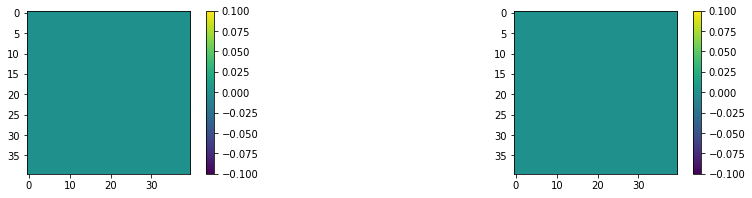

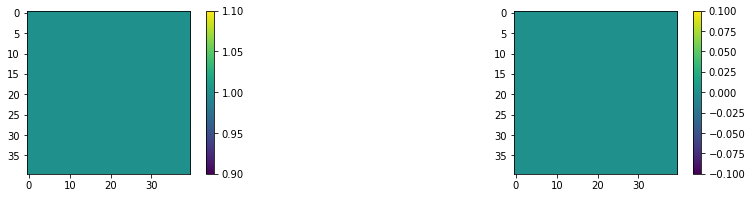

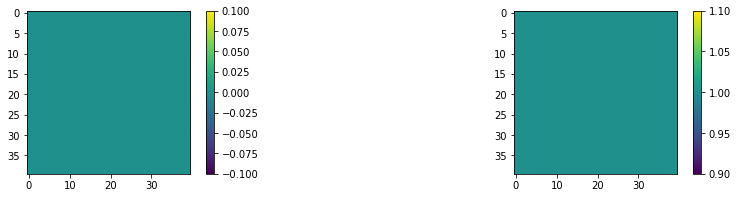

torch.Size([1, 4800])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([[-2.5000e+00, -2.5000e+00,  1.0000e+09,  ...,  2.3750e+00,
          2.3750e+00,  1.0000e+09]], device='cuda:0')


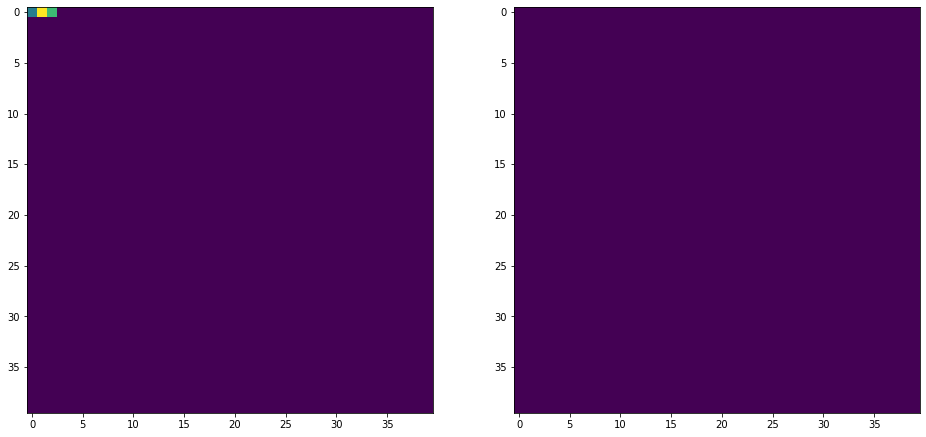

In [24]:
obs0 = store[1][0]
obs0['image'] = tensor(obs0['image']).unsqueeze(0).to(DEVICE, dtype = torch.float)

# def get_coords(nmbins, L):
#     grid = np.linspace(lows[0], highs[0], L, endpoint = False)
#     x, y = np.meshgrid(grid, grid, indexing = 'xy')
#     ms = [torch.full((L*L,), m_i) for m_i in np.logspace(lows[-1], highs[-1], 2*nmbins+1)[1::2]]

#     coords = [np.array(()).reshape(1, -1)]
#     for m in ms:
#         coord = np.transpose(np.stack((x.flatten(), y.flatten(), m))).reshape(1, -1)
#         coords.append(coord)
#     return coords

def get_coords(nmbins, L):
    grid = torch.linspace(lows[0], highs[0], L+1)[:-1]
    x, y = torch.meshgrid(grid, grid, indexing = 'xy')
    ms = [torch.full((L*L,), m_i) for m_i in torch.logspace(lows[-1], highs[-1], 2*nmbins+1)[1::2]]

    coords = [torch.tensor((), device = DEVICE, dtype = torch.float).reshape(1, -1)]
    for m in ms:
        coord = torch.transpose(torch.stack((x.flatten(), y.flatten(), m)), 0, 1).reshape(1, -1).to(DEVICE, dtype = torch.float)
        coords.append(coord)
    return coords

coords = get_coords(nmbins, L)

coord = coords[1]
params = tensor(coord).to(DEVICE, dtype = torch.float)
for coord in coords:
    target = mre_loaded.network.marginal_classifier.Map.coord_to_map(coord.unsqueeze(2)).squeeze()
    plt_imshow(target, cbar = True, size_y = 3)
output = mre_loaded.network(obs0, params)
plt_imshow( output.view(nmbins, L, L) )

In [ ]:
def get_coords(nmbins, L):
    grid = np.linspace(lows[0], highs[0], L, endpoint = False)
    x, y = np.meshgrid(grid, grid, indexing = 'xy')
    ms = [torch.full((L*L,), m_i) for m_i in np.logspace(lows[-1], highs[-1], 2*nmbins+1)[1::2]]

    coords = [np.array(()).reshape(1, -1)]
    for m in ms:
        coord = np.transpose(np.stack((x.flatten(), y.flatten(), m))).reshape(1, -1)
        coords.append(coord)
    return coords

coords = get_coords(nmbins, L)

coord = coords[1]
params = tensor(coord).to(DEVICE, dtype = torch.float)

mre_loaded.network.marginal_classifier.Map.coord_to_map(params.unsqueeze(2)).squeeze()
# target = mre_loaded.network.marginal_classifier.Map.coord_to_map(params.unsqueeze(2)).squeeze()
# plt_imshow(target, cbar = True, size_y = 3)

params = tensor(coord).to(DEVICE, dtype = torch.float)
output = mre_loaded.network(obs0, params)
plt_imshow( output.view(nmbins, L, L) )




In [ ]:
coords

In [ ]:
# torch.set_default_tensor_type(torch.cuda.FloatTensor)  # HACK
# mre = mre_loaded
# network = network_new
# torch.set_default_tensor_type(torch.FloatTensor)

In [ ]:
# for coord in coords:
#     plt_imshow(mre_loaded.network.marginal_classifier.Map.coord_to_map(coord.unsqueeze(2)).squeeze(), cbar = True, size_y = 3)

In [27]:
outputs = []
for i in np.random.randint(0, len(store), 1):
    obs0 = store[i][0]
    v0 = store[i][1]

    obs0['image'] = tensor(obs0['image']).unsqueeze(0).to(DEVICE, dtype = torch.float)
    
    v0 = tensor(v0).unsqueeze(0).to(DEVICE)
    
    coord = coords[0]
    params = tensor(coord).to(DEVICE, dtype = torch.float)
#     params = coord

    output = mre_loaded.network(obs0, params)
    outputs.append(output)

torch.Size([1, 0])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]], device='cuda:0')
2 ((tensor(0, device='cuda:0'),), (tensor(1, device='cuda:0'),), (tensor(2, device='cuda:0'),), (tensor(3, device='cuda:0'),), (tensor(4, device='cuda:0'),), (tensor(5, device='cuda:0'),), (tensor(6, device='cuda:0'),), (tensor(7, device='cuda:0'),), (tensor(8, device='cuda:0'),))
tensor([], device='cuda:0', size=(1, 0))


/scratch/ipykernel_16266/1220073659.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params = tensor(coord).to(DEVICE, dtype = torch.float)


IndexError: index is out of bounds for dimension with size 0

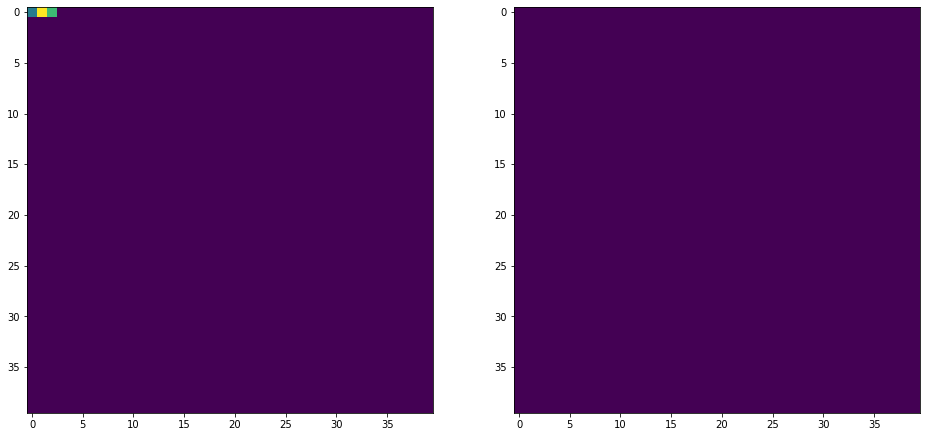

In [26]:
plt_imshow( output.view(nmbins, L, L) )